#  Проект A/B-тест

# Описание проекта

Цель проекта: анализ данных с целью увеличения выручки
Задачи проекта:
- проанализировать и приоретизировать список гипотез для увеличения выручки
- проанализировать A/B-тест

## Описание данных

Данные для первой части
Файл /datasets/hypothesis.csv

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл /datasets/orders.csv

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [6]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
pd.set_option('display.max_colwidth', -1)

In [8]:
hyp_data = pd.read_csv('/datasets/hypothesis.csv')
hyp_data
#объем данных не большой, поэтому наличие дублей и пропусков можем оценить 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [9]:
hyp_data.columns = hyp_data.columns.str.lower() #приведем название столбцов к нижнему регистру
hyp_data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [10]:
hyp_data['ICE'] = (hyp_data['impact'] * hyp_data['confidence']) / hyp_data['efforts'] # считаем ICE для гипотез
print(hyp_data[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))

                                                                                                     hypothesis  \
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстр


---

<div 

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$
</div>

---

Наиболее перспективные гипотезы для проверки по ICE: 8, 0, 7, т.к. обладают высоким влиянием на пользователей, уверенностью в успешности и несут не высокие затраты ресурсов, относительно других гипотез.

In [11]:
hyp_data['RICE'] = (hyp_data['reach'] * hyp_data['impact'] * hyp_data['confidence']) / hyp_data['efforts']
print(hyp_data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)) #считаем RICE для гипотез

                                                                                                     hypothesis  \
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар            
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количес

Наиболее перспективные гипотезы проверки по RICE: 7, 2, 0. Разница лидирующей со следующими гипотезами минимум в два раза. Наиболее перспективные гипотезы по ICE опустились ниже, т.к. предлагаемы изменения, в их случае, затронут меньшее количество пользователей. Так как  RICE учитывает больше факторов, влияющих на успешность теста, логично в первую очередь протестировать 7, 2, 0 гипотезы.

## Подготовка данных к кумулятивному анализу

In [12]:
orders = pd.read_csv('/datasets/orders.csv')
orders.columns = orders.columns.str.lower()
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [13]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [14]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [15]:
#Соберём агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                                                                     orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique,\
                                           'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).\
sort_values(by=['date','group'])

In [16]:
# Аналогично получим агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                         visitors['group'] == x['group'])].\
                                       agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).\
sort_values(by=['date','group'])

In [17]:
#Объединим обе таблицы
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                                                                     orders['group'] == x['group'])].\
                                     agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique,\
                                          'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).\
sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях  
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                         visitors['group'] == x['group'])].\
                                       agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).\
sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=\
                                        ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitorid']
print(cumulativeData.head(5))
print(cumulativeData.tail(5))

        date group  orders  buyers  revenue  visitorid
0 2019-08-01  A     24      20      148579   719      
1 2019-08-01  B     21      20      101217   713      
2 2019-08-02  A     44      38      242401   1338     
3 2019-08-02  B     45      43      266748   1294     
4 2019-08-03  A     68      62      354874   1845     
         date group  orders  buyers  revenue  visitorid
57 2019-08-29  B     596     544     5559398  17708    
58 2019-08-30  A     545     493     4022970  18037    
59 2019-08-30  B     620     567     5774631  18198    
60 2019-08-31  A     557     503     4084803  18736    
61 2019-08-31  B     640     586     5907760  18916    


## Строим графики кумулятивной выручки по дням и группам

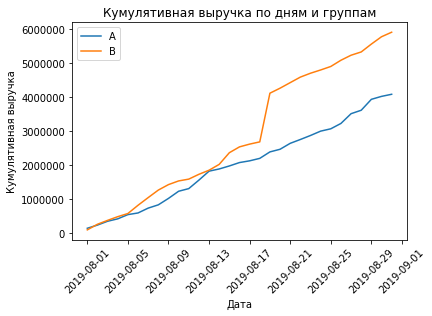

In [18]:

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xlim = ('2019-08-01', '2019-08-31')
plt.xticks(rotation= 45)
plt.legend()
plt.show()


Вывод
Выручка увеличивается на протяжении всего теста в обеих группах. Однако график группы B в определенной точке реско растет и приводит группу к выручке больше на 2 000 000, чем группа А. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

## Строим график кумулятивного среднего чека по группам

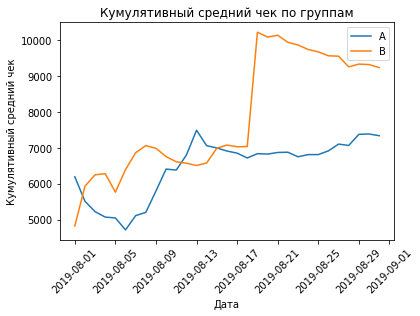

In [19]:

#разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.xlim = ('2019-08-01', '2019-08-31')
plt.xticks(rotation= 45)
plt.legend()
plt.show()

В обеих группах средний чек не стабильный. Тем не менее, если в группе А в первой половине теста средний чек возрастал постепенно и до конца теста остается в диапозоне 6500- 7000, то средний чек группы В резко вырос в одной точке и постепенно опускается. Вероятно, нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

## Строим график относительного изменения кумулятивного среднего чека группы B к группе A

No handles with labels found to put in legend.


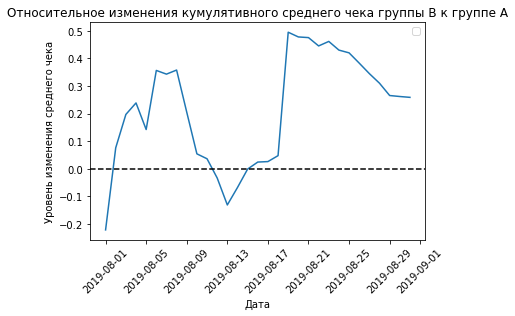

In [20]:

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',\
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],\
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/\
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Уровень изменения среднего чека')
plt.xlim = ('2019-08-01', '2019-08-31')
plt.xticks(rotation= 45)
plt.legend()
plt.show()


В нескольких точках график различия между сегментами резко «скачет». Необходима проверка на выбросы.

## Стороим график кумулятивной конверсии по группам

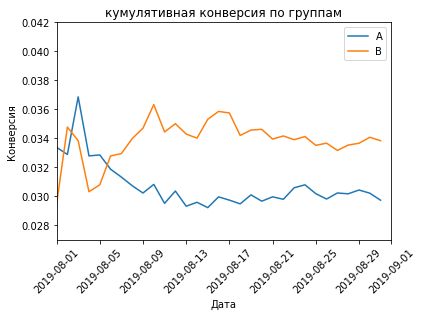

In [21]:

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitorid']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.axis(["2019-08-01", '2019-09-1', 0.027, 0.042])
plt.title('кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xlim = ('2019-08-01', '2019-08-31')
plt.xticks(rotation= 45)
plt.legend()
plt.show()

С начала теста в обеих группах наблюдается снижение показателей, но группа B начинает рост и постепенно фиксируется в одном диапазоне, а группа А, симметрично продолжает снижаться и, также, фиксируется в одном диапазоне. Пока кумулятивные метрики не стабилизировались рано делать выводы.

### Строим график относительного изменения кумулятивной конверсии группы B к группе A

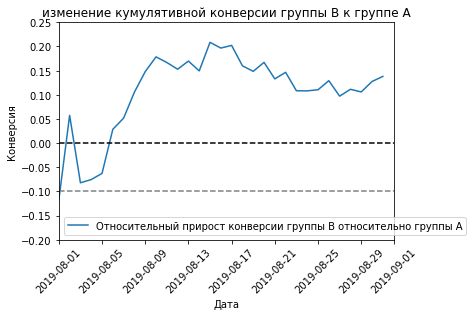

In [22]:

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].\
merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left',\
      suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/\
         mergedCumulativeConversions['conversionA']-1,\
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.25])
plt.title('изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xlim = ('2019-08-01', '2019-08-31')
plt.xticks(rotation= 45)
plt.legend()
plt.show()

В начале теста конверсия группа B ниже относительно группы А, но достаточно быстро набирает уровень +0.3 и решительно "обгоняет".

### Строим точечный график количества заказов по пользователям

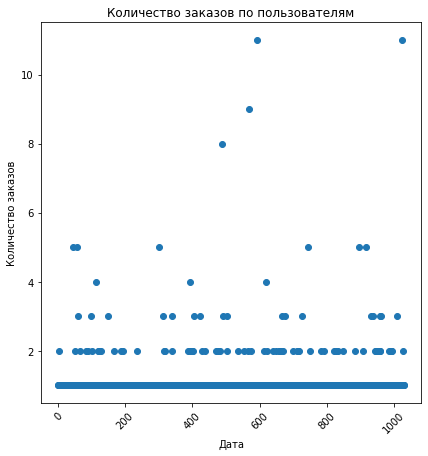

In [23]:

orders_by_users = orders.groupby('visitorid', as_index=False).agg(
    {'transactionid': 'nunique'})
 
orders_by_users = orders_by_users.rename(columns={'transactionid':'orders_number'})
 
fig = plt.figure(figsize = (15,7))
 
# диаграмма рассеяния количества заказов по пользователям
 
x_values_orders = pd.Series(range(0, len(orders_by_users)))
plt.subplot(1,2,1)
plt.scatter(x_values_orders, orders_by_users['orders_number'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xlim = ('2019-08-01', '2019-08-31')
plt.xticks(rotation= 45)
plt.show()

Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. Скорее всего, их поведение отличается от нормального. Если речь не идёт об интернет-магазине с регулярным спросом, «обычный» пользователь совершает не больше двух заказов за короткий срок. Много пользователей с 2-3заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

### Считаем перцентили количества заказов на пользователя

In [24]:

print(np.percentile(orders_by_users['orders_number'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз. Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов.

### Строим точечный график стоимостей заказов

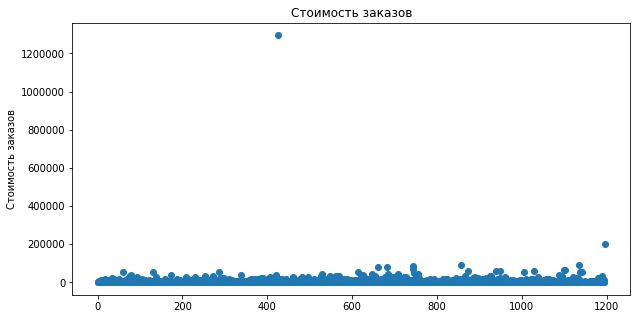

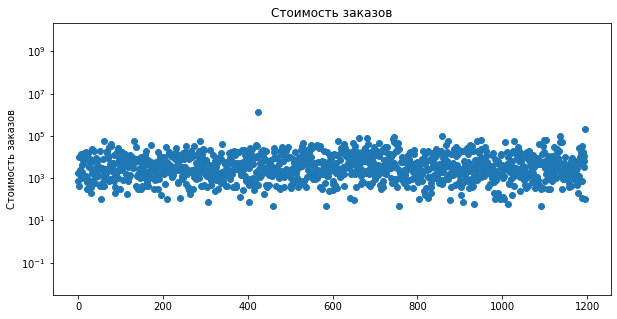

In [25]:

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'] )
plt.title('Стоимость заказов')
plt.ylabel('Стоимость заказов')
plt.show()

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.yscale('log')
plt.scatter(x_values, orders['revenue'] )
plt.title('Стоимость заказов')
plt.ylabel('Стоимость заказов')
plt.show()

На графике можно определить рекордное значение - заказ суммой больше 1.2 млн. Вероятно именно этот заказ создает резкий рост показателей группы B. Выбивающихся значений не так много. Определим границы выборки с помощью персентелей.

### Считаем 95-й и 99-й перцентили стоимости заказов

In [26]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% пользователей оформляли заказ свыше 28000. И 1% пользователей заказывали дороже, чем на 58233.2. Выберем 58233 на одного пользователя за нижнюю границу числа заказов, т.к. важно учесть и пользователей с более высоким средним чеком.

In [27]:
cumulativeData

,date,group,orders,buyers,revenue,visitorid,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


### Считаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [28]:

#подготовка данных
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].\
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].\
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


In [29]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

In [30]:
#создаем переменные с пользователями и числом совершенных заказов (от 1)
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).\
agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).\
agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']

In [31]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].\
                                                       sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 498    1
 499    7
 500    1
 501    1
 502    1
 Name: orders, Length: 503, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18228    0
 18229    0
 18230    0
 18231    0
 18232    0
 Name: orders, Length: 18233, dtype: int64]

In [32]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.\
                                                        arange(data['visitorsPerDateA'].sum() -\
                                                               len(ordersByUsersA['orders'])), name='orders')],\
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.\
                                                        arange(data['visitorsPerDateB'].sum() -\
                                                               len(ordersByUsersB['orders'])), name='orders')],\
                    axis=0)

In [33]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).\
agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).\
agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() -\
                                                                           len(ordersByUsersA['orders'])),\
                                                        name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() -\
                                                                           len(ordersByUsersB['orders'])),\
                                                        name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


Принимая 0.05 за критический уровень статистической значимости, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - можем отвергнуть. Относительная разница конверсии группы B равен 13.8%

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [34]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                          orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].\
                       mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B выше среднего чека группы А по сырым данным.

### Чистим данные

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 58233 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. 

In [35]:
#Узнаем, сколько всего аномальных пользователей 
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorid'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().\
sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 
#31 аномальный пользователь

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorid, dtype: int64
(31,)


### Считаем статистическую значимость различий в конверсии между группами теста по очищенным данным

In [36]:
#подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].\
                                                           isin(abnormalUsers))]['orders'],pd.\
                             Series(0, index=np.arange(data['visitorsPerDateA'].sum() -\
                                                       len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].\
                                                           isin(abnormalUsers))]['orders'],pd.\
                             Series(0, index=np.arange(data['visitorsPerDateB'].sum() -\
                                                       len(ordersByUsersB['orders'])),name='orders')],axis=0)

#Применим статистический критерий Манна-Уитни к полученным выборкам:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.005
0.174


Принимая 0.05 за критический уровень статистической значимости, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - можем отвергнуть. Относительная разница конверсии группы B равен 17.4% 
Результаты по конверсии практически не изменились. Но разница в конверсиях увеличилась.

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [37]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.399
-0.020


P-value сильнее увеличился, но уровень остался значительно больше alpha- 0.05, при этом разница между сегментами значительно  изменилась. Исключив выбросы, средний чек группы B оказался ниже на 2% группы А. 

## Решение по результатам теста

- По отношению к среднему чеку не выявлено статистически значимого различия между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Средний чек группы B ниже группы А на 2%. Учитывая короткий срок, сложно делать вывод об успешноти теста. Разница не высокая и, судя по графикам из исследования - нестабильная. Также, важно учитывать диапозон среднего чека в целом по всему интернет-магазину; 

- По отношению к конверсии выявлено наличие статистически заначимого различия между группами; 
- Показатель конверсии группы B значительно выше группы А;


Так как конверсия - важный показатель эффективности, можно принять решение о завершении теста в пользу группы B. Так же, для пользователей группы B можно транслировать дополнительные продукты при оформлении для увеличения среднего чека.
